# Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv", index_col = "PassengerId")
test_df = pd.read_csv("test.csv", index_col = "PassengerId")

In [3]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 1. Feature Classification

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### categorycal : Survived, Pclass, SibSp, Embarked
#### numerical: Sex, Fare
#### Blank or null : Cabin, Age, Embarked

In [9]:
train_df['Survived'] = train_df['Survived'].astype('category')
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [10]:
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")

convert_cat(train_df,features)
convert_cat(test_df,features)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### 1.1. Distribution of numerical features across sample

In [12]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### 1.2. Distribution of Categorical features

In [13]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 2. Exploratory Data Analysis (EDA)

### 2.1. Corelating categorical features

#### Target feature: 'Survived'

In [14]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
train_df['Survived'].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Only 38.38% servived the disaster

#### Sex

In [16]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

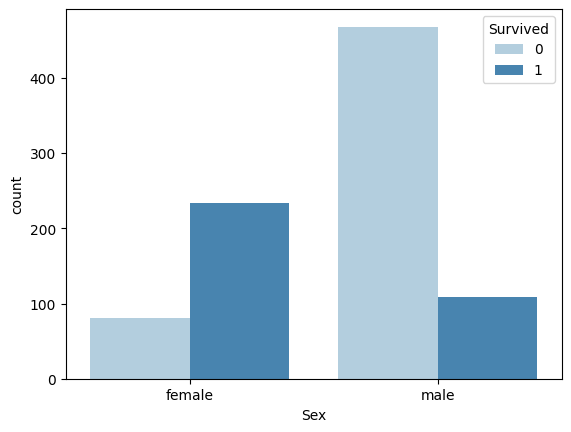

In [17]:
sns.countplot(data= train_df, x = train_df['Sex'], hue= train_df['Survived'], palette= "Blues")

- Remaining Categorical Features Columns

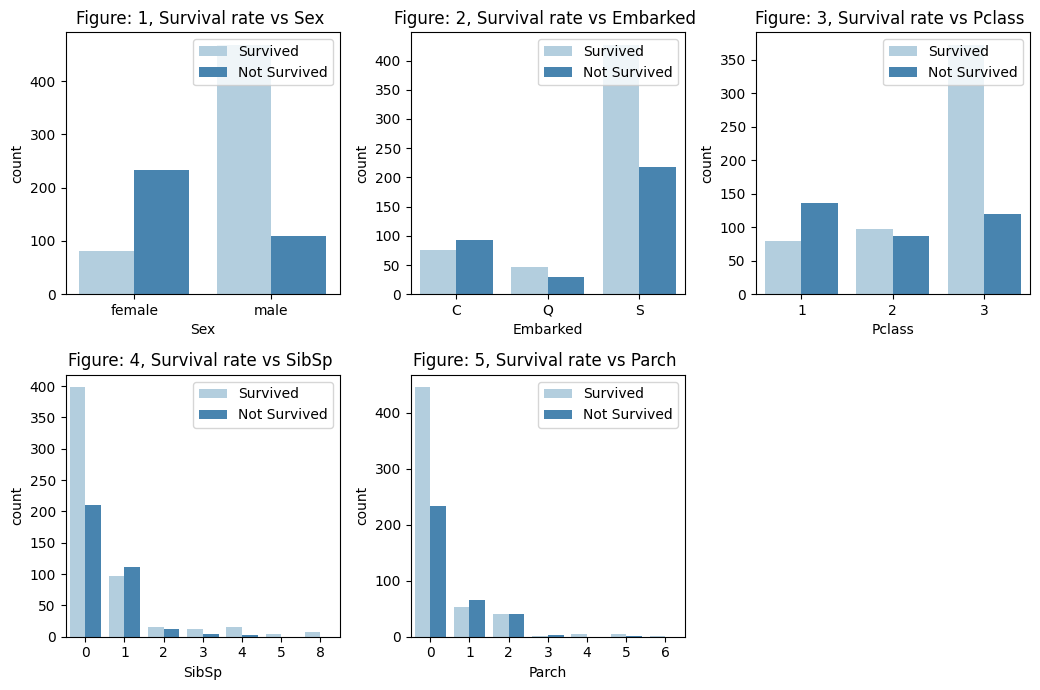

In [18]:
cols = ["Sex","Embarked","Pclass","SibSp","Parch"]

n_rows = 2
n_cols = 3

fig,ax = plt.subplots(n_rows,n_cols,figsize = (n_cols * 3.5, n_rows * 3.5))

for r in range(n_rows):
    for c in range(n_cols):
        i = r*n_cols + c
        if(i < len(cols)):
            ax_i = ax[r,c]
            sns.countplot(data = train_df,x = cols[i],hue = 'Survived',palette="Blues", ax = ax_i)
            ax_i.set_title(f"Figure: {i+1}, Survival rate vs {cols[i]} ")
            ax_i.legend(title = "",loc = "upper right", labels =["Survived","Not Survived"])

ax.flat[-1].set_visible(False)
plt.tight_layout()

### Observation:
- Survival rate: 
##### Male survival rate > female
##### Most people embarked on S, and has the highest survival rate
##### Most people have Pclass 3, and has the highest survival rate
##### Most people do not have siblings

### 3.2. EDA for Numeric Features
#### Age

Text(0.5, 1.0, 'Histogram of Age')

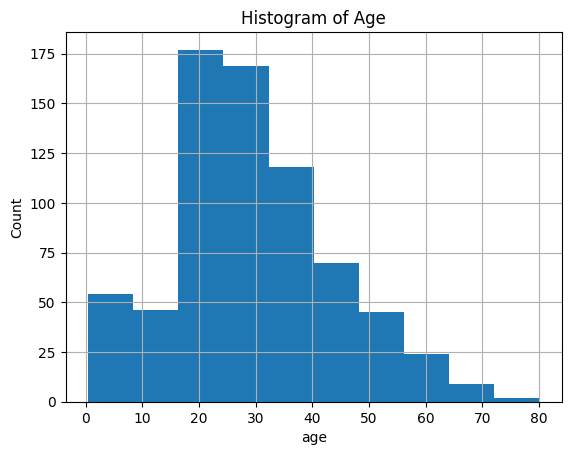

In [19]:
train_df["Age"].hist()
plt.xlabel("age")
plt.ylabel("Count")
plt.title("Histogram of Age")

<Axes: xlabel='Fare', ylabel='count'>

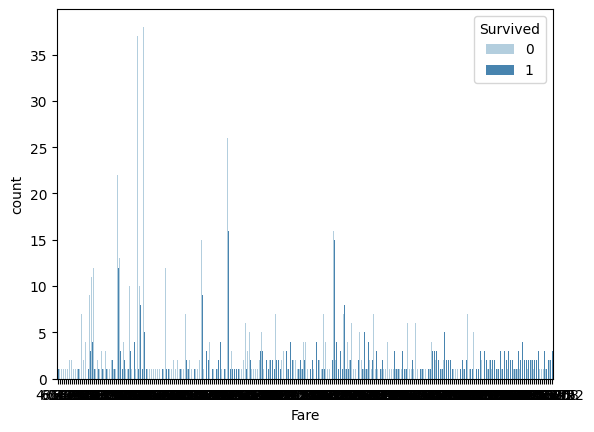

In [54]:
fare_category = ["Economic","Standard","Expensive","Luxury"]
quatile_data = pd.qcut(train_df['Fare'],q = 4, labels= fare_category)

sns.countplot(data = quatile_data,x = train_df['Fare'], hue = train_df["Survived"], palette= "Blues")


In [55]:
train_df["Fare"]

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64